# HomeWork 8
**DeadLine : 23:59 29 Aban 1400**

**Total points : 100pts**

# 1. Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [ ]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

Cloning into 'google-images-download'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 719 (delta 32), reused 48 (delta 32), pack-reused 666
Receiving objects: 100% (719/719), 319.77 KiB | 18.81 MiB/s, done.
Resolving deltas: 100% (422/422), done.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating google_images_download.egg-info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_image

costom dataset config:

In [ ]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [ ]:
!googleimagesdownload -cf dataset.json


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2019-honda-civic-sedan-1558453497.jpg?crop=1xw:0.9997727789138833xh;center,top&resize=480:*
Completed Image ====> 1.2019-honda-civic-sedan-1558453497.jpg
Image URL: https://cars.usnews.com/static/images/Auto/custom/14737/2022_Acura_ILX_1.jpg
IOError on an image...trying next one... Error: The read operation timed out
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2022-chevrolet-corvette-z06-1607016574.jpg?crop=0.737xw:0.738xh;0.181xw,0.218xh&resize=640:*
Completed Image ====> 2.2022-chevrolet-corvette-z06-1607016574.jpg
Image URL: https://www.cnet.com/a/img/CSTqzAl5wJ57HHyASLD-a0vS2O0=/940x528/2021/04/05/9e065d90-51f2-46c5-bd3a-416fd4983c1a/elantra-1080p.jpg
Completed Image ====> 3.elantra-1080p.jpg
Image URL: https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit-640x354.jpg
Completed Imag

## 2.2 Splite data To train set && test set

In [ ]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

In [ ]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


60
60
60
60
60


In [ ]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


## 2.2. Copy Training data to Google Drive

In [ ]:
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
shutil.move('./train/', destination)
shutil.move('./test/', destination)


'/content/drive/MyDrive/HW7_Dataset/test'

In [ ]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 3. Load Dataset From Google Drive

In [3]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test/'+ ' ./')


0

In [4]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'train images: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard train images:  47
Leopard test images:  13
bird train images:  47
bird test images:  13
car train images:  47
car test images:  13
cat train images:  47
cat test images:  13
dog train images:  47
dog test images:  13


# 4. Generator

In [51]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/train',
                                                    color_mode='rgba', target_size=(256, 256), 
                                                    class_mode='categorical', shuffle=True,
                                                    batch_size = batch_size,
                                                    save_format='jpg', interpolation='nearest',
                                                    
                                                    )
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/test',
                                                        color_mode='rgba', target_size=(256, 256), 
                                                        class_mode='categorical', shuffle=True,
                                                        batch_size = batch_size,
                                                        save_format='jpg', interpolation='nearest',
                                                        )


Found 219 images belonging to 5 classes.
Found 61 images belonging to 5 classes.


In [52]:
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

(16, 256, 256, 4)
(16, 5)


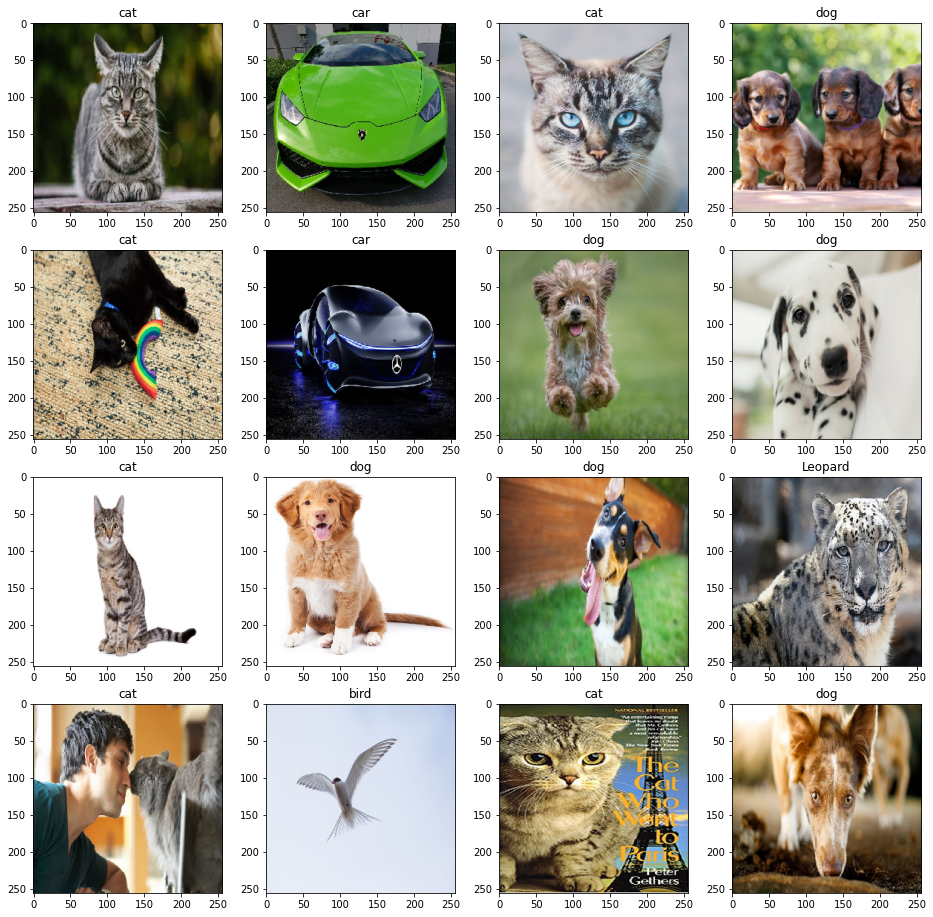

In [53]:
from matplotlib import pyplot as plt
import numpy as np
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(5)
def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img)
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)


# Part A: build and train model without using data augmentation

In [54]:
import keras
def build_model(layers):
  model = keras.models.Sequential(layers = layers)
  return model

In [55]:
import tensorflow
EPOCHS = 15
BATCH_SIZE = 32
LOSS = keras.losses.categorical_crossentropy
OPTIMIZER = tensorflow.keras.optimizers.Adam()

In [ ]:
model = build_model([
                     keras.layers.Input(shape=(256, 256, 4)),
                     keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Flatten(),
                     keras.layers.Dense(64, activation='relu'),
                     keras.layers.Dense(5, activation='softmax')
])
print(model.summary())
model.compile(loss= LOSS, optimizer= OPTIMIZER, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      592       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [ ]:
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

4/4 [==============================] - 1s 225ms/step - loss: 2.4487 - accuracy: 0.4426


[2.4487485885620117, 0.44262295961380005]

# Part B: train model using data augmentation

In [14]:
batch_size = 16
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/train',
                                                    color_mode='rgba', target_size=(256, 256), 
                                                    class_mode='categorical', shuffle=True,
                                                    batch_size = batch_size,
                                                    save_format='jpg', interpolation='nearest',
                                                    )

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/test',
                                                        color_mode='rgba', target_size=(256, 256), 
                                                        class_mode='categorical', shuffle=True,
                                                        batch_size = batch_size,
                                                        save_format='jpg', interpolation='nearest',
                                                        )

Found 219 images belonging to 5 classes.
Found 61 images belonging to 5 classes.


In [15]:
def build_model(train_generator, validation_generator):
  model = keras.models.Sequential(layers = [
                     keras.layers.Input(shape=(256, 256, 4)),
                     keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Flatten(),
                     keras.layers.Dense(64, activation='relu'),
                     keras.layers.Dense(5, activation='softmax')
                    ])
  model.compile(loss= LOSS, optimizer= OPTIMIZER, metrics=['accuracy'])
  model.fit(train_generator, epochs=EPOCHS*3, batch_size=BATCH_SIZE, validation_data=validation_generator)
  return model

In [11]:
model = build_model(train_generator, validation_generator)

Epoch 1/45
14/14 [==============================] - 22s 696ms/step - loss: 1.6178 - accuracy: 0.2420 - val_loss: 1.6019 - val_accuracy: 0.2787
Epoch 2/45
14/14 [==============================] - 9s 659ms/step - loss: 1.5978 - accuracy: 0.1826 - val_loss: 1.5981 - val_accuracy: 0.2131
Epoch 3/45
14/14 [==============================] - 9s 655ms/step - loss: 1.6145 - accuracy: 0.1644 - val_loss: 1.5966 - val_accuracy: 0.2623
Epoch 4/45
14/14 [==============================] - 9s 654ms/step - loss: 1.5905 - accuracy: 0.2511 - val_loss: 1.6062 - val_accuracy: 0.2131
Epoch 5/45
14/14 [==============================] - 9s 636ms/step - loss: 1.5708 - accuracy: 0.2740 - val_loss: 1.5433 - val_accuracy: 0.4098
Epoch 6/45
14/14 [==============================] - 9s 646ms/step - loss: 1.5023 - accuracy: 0.3242 - val_loss: 1.4958 - val_accuracy: 0.3770
Epoch 7/45
14/14 [==============================] - 9s 655ms/step - loss: 1.4814 - accuracy: 0.3653 - val_loss: 1.5343 - val_accuracy: 0.3115
Epoch

In [12]:
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

4/4 [==============================] - 2s 505ms/step - loss: 1.3387 - accuracy: 0.4590


[1.3387227058410645, 0.4590163826942444]

now we try this model with another type of data augmentation.

In [17]:
batch_size = 16
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/train',
                                                    color_mode='rgba', target_size=(256, 256), 
                                                    class_mode='categorical', shuffle=True,
                                                    batch_size = batch_size,
                                                    save_format='jpg', interpolation='nearest',
                                                    )

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/test',
                                                        color_mode='rgba', target_size=(256, 256), 
                                                        class_mode='categorical', shuffle=True,
                                                        batch_size = batch_size,
                                                        save_format='jpg', interpolation='nearest',
                                                        )

Found 219 images belonging to 5 classes.
Found 61 images belonging to 5 classes.


In [18]:
model = build_model(train_generator, validation_generator)
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

4/4 [==============================] - 1s 233ms/step - loss: 1.4676 - accuracy: 0.5246


[1.4676457643508911, 0.5245901346206665]

# Part C: build and train model with dropout

In [56]:
batch_size = 16
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/train',
                                                    color_mode='rgba', target_size=(256, 256), 
                                                    class_mode='categorical', shuffle=True,
                                                    batch_size = batch_size,
                                                    save_format='jpg', interpolation='nearest',
                                                    )

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/HW7_Dataset/test',
                                                        color_mode='rgba', target_size=(256, 256), 
                                                        class_mode='categorical', shuffle=True,
                                                        batch_size = batch_size,
                                                        save_format='jpg', interpolation='nearest',
                                                        )

Found 219 images belonging to 5 classes.
Found 61 images belonging to 5 classes.


In [57]:
def build_model(dropout_probability):
  model = keras.models.Sequential(layers = [
                     keras.layers.Input(shape=(256, 256, 4)),
                     keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                     keras.layers.Dropout(dropout_probability),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                     keras.layers.Dropout(dropout_probability),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                     keras.layers.Dropout(dropout_probability),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     keras.layers.Dropout(dropout_probability),
                     keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                     keras.layers.Flatten(),
                     keras.layers.Dense(64, activation='relu'),
                     keras.layers.Dense(5, activation='softmax')])
  model.compile(loss= LOSS, optimizer= OPTIMIZER, metrics=['accuracy'])
  model.fit(train_generator, epochs=EPOCHS*4, batch_size=BATCH_SIZE, validation_data=validation_generator)
  return model

In [15]:
model = build_model(dropout_probability=0.5)
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

Epoch 1/60
14/14 [==============================] - 21s 599ms/step - loss: 2.7059 - accuracy: 0.1872 - val_loss: 1.6093 - val_accuracy: 0.1967
Epoch 2/60
14/14 [==============================] - 8s 590ms/step - loss: 1.5996 - accuracy: 0.2237 - val_loss: 1.6086 - val_accuracy: 0.1967
Epoch 3/60
14/14 [==============================] - 8s 589ms/step - loss: 1.5769 - accuracy: 0.2877 - val_loss: 1.5991 - val_accuracy: 0.3115
Epoch 4/60
14/14 [==============================] - 8s 584ms/step - loss: 1.4724 - accuracy: 0.3607 - val_loss: 1.5923 - val_accuracy: 0.3115
Epoch 5/60
14/14 [==============================] - 8s 593ms/step - loss: 1.4333 - accuracy: 0.4110 - val_loss: 1.5845 - val_accuracy: 0.3443
Epoch 6/60
14/14 [==============================] - 8s 597ms/step - loss: 1.3563 - accuracy: 0.4155 - val_loss: 1.5765 - val_accuracy: 0.3279
Epoch 7/60
14/14 [==============================] - 8s 598ms/step - loss: 1.2762 - accuracy: 0.4566 - val_loss: 1.5578 - val_accuracy: 0.3279
Epoch

[1.2159526348114014, 0.4590163826942444]

test with another dropout probability:

In [ ]:
model = build_model(dropout_probability=0.4)
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

In [58]:
model = build_model(dropout_probability=0.7)
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

Epoch 1/60
14/14 [==============================] - 9s 613ms/step - loss: 10.2050 - accuracy: 0.2192 - val_loss: 1.6092 - val_accuracy: 0.2295
Epoch 2/60
14/14 [==============================] - 8s 587ms/step - loss: 1.6501 - accuracy: 0.1689 - val_loss: 1.6093 - val_accuracy: 0.1967
Epoch 3/60
14/14 [==============================] - 8s 591ms/step - loss: 1.6176 - accuracy: 0.2055 - val_loss: 1.6094 - val_accuracy: 0.1967
Epoch 4/60
14/14 [==============================] - 8s 597ms/step - loss: 1.6049 - accuracy: 0.2283 - val_loss: 1.6093 - val_accuracy: 0.1967
Epoch 5/60
14/14 [==============================] - 8s 587ms/step - loss: 1.6115 - accuracy: 0.1963 - val_loss: 1.6092 - val_accuracy: 0.1967
Epoch 6/60
14/14 [==============================] - 8s 590ms/step - loss: 1.6103 - accuracy: 0.1826 - val_loss: 1.6093 - val_accuracy: 0.1967
Epoch 7/60
14/14 [==============================] - 8s 588ms/step - loss: 1.6127 - accuracy: 0.2146 - val_loss: 1.6091 - val_accuracy: 0.1967
Epoch

[1.496298909187317, 0.44262295961380005]

In [33]:
model = build_model(dropout_probability=0.25)
model.evaluate(validation_generator, batch_size=BATCH_SIZE)

Epoch 1/60
14/14 [==============================] - 9s 596ms/step - loss: 1.7353 - accuracy: 0.2009 - val_loss: 1.6066 - val_accuracy: 0.1803
Epoch 2/60
14/14 [==============================] - 8s 563ms/step - loss: 1.5971 - accuracy: 0.1781 - val_loss: 1.5977 - val_accuracy: 0.2131
Epoch 3/60
14/14 [==============================] - 8s 566ms/step - loss: 1.5686 - accuracy: 0.2648 - val_loss: 1.5696 - val_accuracy: 0.3443
Epoch 4/60
14/14 [==============================] - 8s 582ms/step - loss: 1.5220 - accuracy: 0.3196 - val_loss: 1.5528 - val_accuracy: 0.3934
Epoch 5/60
14/14 [==============================] - 8s 572ms/step - loss: 1.4410 - accuracy: 0.3151 - val_loss: 1.4862 - val_accuracy: 0.4754
Epoch 6/60
14/14 [==============================] - 8s 567ms/step - loss: 1.4097 - accuracy: 0.4064 - val_loss: 1.4606 - val_accuracy: 0.4098
Epoch 7/60
14/14 [==============================] - 8s 567ms/step - loss: 1.3475 - accuracy: 0.4064 - val_loss: 1.4463 - val_accuracy: 0.4590
Epoch 

[1.3025147914886475, 0.5573770403862]

# extra part

In [44]:
from sklearn.metrics import classification_report
y_predict = model.predict(validation_generator)
y_predict = np.argmax(y_predict, axis=1)
y_true = validation_generator.classes
print(classification_report(y_true, y_predict, target_names = categories))

              precision    recall  f1-score   support

     Leopard       0.19      0.25      0.21        12
        bird       0.20      0.25      0.22        12
         car       0.17      0.18      0.17        11
         cat       0.00      0.00      0.00        13
         dog       0.00      0.00      0.00        13

    accuracy                           0.13        61
   macro avg       0.11      0.14      0.12        61
weighted avg       0.11      0.13      0.12        61



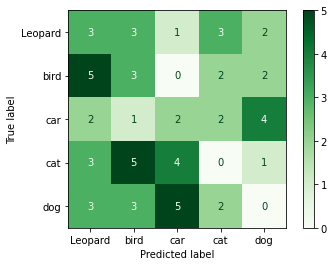

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Greens)
plt.show()